# Plot the residence time and protein bound ratio for model A (Nonly)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys

In [2]:
sys.path.append('/home/local/WIN/msang2/mankun/dimerEnhanceProteinDNA/')
# modules for direct calculation
import analytics as ana
import analyzeEqui as num
# stochastic simulation (Gillespie)
from Simulations.odeSolver.Nonly import rxnNetwork, labels
from Simulations.odeSolver.main import main as numericSolver
# for generating parameters
from GenerateParameters import GenParameters

In [51]:
def plotHeader(
    scale=1.0, fixSize=True, sizeX=5, sizeY=5,
    lgdLoc=[0.55,0.00], lgdFontSize=22, lgdHandleL=0.3, 
    lgdTitle='', lgdTtlFontSize=22,
    labelFontSize=20, tickFontSize=27, 
    tickL=15, tickW=2, spineLineW=2
):
    labelfont = {'fontsize':labelFontSize*scale}
    tickfont = {'fontsize':tickFontSize*scale}
    legend = {'fontsize':lgdFontSize*scale, 'loc':lgdLoc, 'handlelength':lgdHandleL*scale, 
              'title':lgdTitle, 'title_fontsize':lgdTtlFontSize*scale,
             'framealpha':0.0}
    if fixSize:
        fig = plt.figure(figsize=(sizeX*scale,sizeY*scale))
        ax = fig.add_subplot(111)
    else:
        ax = plt.gca()
    plt.tick_params(length=tickL*scale, width=tickW*scale)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(spineLineW*scale)  # change width
    colors = [
        'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
        'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
    ]
    linsStyles = ['-', '--']
    return ax, colors, linsStyles, legend, labelfont, tickfont, 0.6022 # C0, nm^-3 -> M
color_gamma = 'tab:green'
color_CP0 = 'tab:brown'
color_kbP = 'tab:orange'

## b) residence time v.s. chiPN & gamma, irreversible

In [30]:
parm_file = GenParameters(
    ifwrite=False, numTargets=0,
    KPS=lambda KPN: 1e3*KPN, 
    NP0=[0.1], 
    KPN=np.logspace(1, 3, 5+2*20)*2.0, 
    KPP=[np.exp(23)], 
    area3Dto1D=[1, 10], lengthScale=1,
)

In [31]:
def tauA_irr(parm):
    gam = parm['gamma']
    koffN = parm['kbPN']
    KPN = parm['KPN']
    CN = parm['CN0']
    # combined parms
    chiN = KPN*CN
    return (1+gam*chiN/2)/koffN

def tauA_monomer(parm):
    return 1 / parm['kbPN']

resT_A_irr = tauA_irr(parm_file)
resT_A_m = tauA_monomer(parm_file)

In [32]:
# parm_num = GenerateParameters_or_write(ifwrite=False, plotDenseData=False)
parm_num = GenParameters(
    ifwrite=False, numTargets=0,
    KPS=lambda KPN: 1e3*KPN, 
    NP0=[0.1], 
    KPN=np.logspace(1, 3, 5+2*0)*2.0, 
    KPP=[0], 
    area3Dto1D=[1, 10], lengthScale=1,
)
parm_num_irr = GenParameters(
    ifwrite=False, numTargets=0,
    KPS=lambda KPN: 1e3*KPN, 
    NP0=[0.1], 
    KPN=np.logspace(1, 3, 5+2*0)*2.0, 
    KPP=[np.inf], 
    area3Dto1D=[1, 10], lengthScale=1,
)
equi_num_irr = numericSolver(parm_df=parm_num_irr, labels=labels, model=rxnNetwork)
equi_num_m = numericSolver(parm_df=parm_num, labels=labels, model=rxnNetwork)

2025-03-05 17:38:06.448255
Number of cores used:  10/36
Finished parallel processing.
2025-03-05 17:38:06.659187
Number of cores used:  10/36
Finished parallel processing.


In [33]:
resT_num_m = np.zeros(parm_num.shape[0])
resT_num_irr = np.zeros(parm_num.shape[0])
for iloc in range(parm_num.shape[0]):
    parm = parm_num.iloc[iloc]
    resT_num_m[iloc] = num.calc_resT_modelA(parm, equi_num_m.iloc[iloc])
    resT_num_irr[iloc] = num.calc_resT_modelA(parm, equi_num_irr.iloc[iloc])

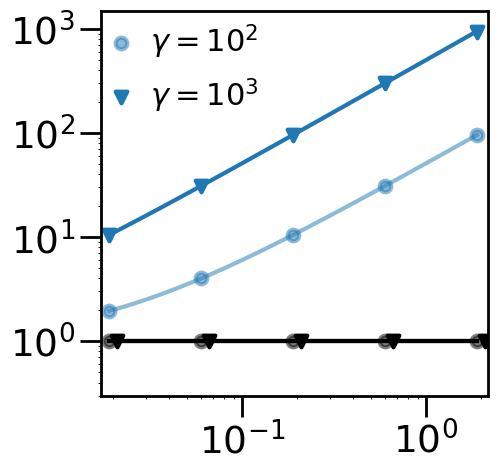

In [35]:
# >>>>>>>>>>>>>>>>>>>>>>>> Initialize Plotting >>>>>>>>>>>>>>>>>>>>>>>>
ax, _, lineStyles, legend, labelfont, tickfont, C0 = plotHeader(
    scale=1.0, fixSize=True, sizeX=5, sizeY=5,
    lgdLoc=[0.01,0.70], lgdFontSize=22, lgdHandleL=0.3, 
    lgdTitle='', lgdTtlFontSize=22,
    labelFontSize=20, tickFontSize=27, 
    tickL=15, tickW=2, spineLineW=2
)
color_gamma = 'tab:blue'
alphas = [0.5, 1]
markers = ['o','v']
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
gamList = np.unique(parm_file['gamma'])
ylim = [3e-1,1.5e3]
xlim = [(parm_num['KPN']*parm_num['CN0']).min()*0.9, (parm_num['KPN']*parm_num['CN0']).max()*1.15]
linewidth = 3
for i, gam in enumerate(gamList):
    selected = (parm_file['gamma']==gam)
    selected_num = (parm_num['gamma']==gam)
    # analytical, irreversible
    ax.plot(
        (parm_file['KPN']*parm_file['CN0'])[selected],
        (resT_A_irr*parm_file['kbPN'])[selected],
        color=color_gamma, alpha=alphas[i], lw=linewidth
    )
    # analytical, monomer
    ax.plot(
        (parm_file['KPN']*parm_file['CN0'])[selected],
        (resT_A_m*parm_file['kbPN'])[selected],
        color='black', lw=linewidth,
    )
#     plt.fill_between(
#         (parm_file['KPN']*parm_file['CN0'])[selected], 
#         (resT_A_m*parm_file['kbPN'])[selected], ylim[1],
#         color = 'tab:green', alpha=0.2
#     )
    # numerical
    ax.scatter(
        (parm_num['KPN']*parm_num['CN0'])[selected],
        (resT_num_irr*parm_num['kbPN'])[selected],
        color=color_gamma, alpha=alphas[i], s=70, lw=linewidth,
        marker=markers[i], label='$\\gamma=10^{%.0f}$'%np.log10(gam),
    )
    ax.scatter(
        (parm_num['KPN']*parm_num['CN0'])[selected]*(1+i/10),
        (resT_num_m*parm_num['kbPN'])[selected], s=70, lw=linewidth,
        color='black', alpha=alphas[i], marker=markers[i], 
    )

ax.loglog()
ax.set_ylim(ylim)
ax.set_xlim(xlim)
plt.legend(**legend)
plt.xticks(**tickfont)
plt.yticks(**tickfont)
plt.savefig('resT_vs_chiN_gamma.png', transparent=True)

## c) kbP and KPP\*CP0

In [45]:
GenParms = lambda kbP, nDenseKPP :GenParameters(
    ifwrite=False, numTargets=0, kbPP_fixed=kbP,   
    KPN=[200], NP0=[0.1], area3Dto1D=[114],
    KPP=np.logspace(1,9,8+7*nDenseKPP), 
#     KPP=[1e0, 1e3, 1e4, 1e6], 
)

In [46]:
parm_num = pd.concat([GenParms(0.1, 0), GenParms(1, 0), GenParms(10, 0)], axis=0, ignore_index=True)
for i, row in parm_num.iterrows():
    parm_num.loc[i,'ID'] = int(i)
equi_num = numericSolver(parm_df=parm_num, labels=labels, model=rxnNetwork)

parm_ana = pd.concat([GenParms(0.1, 10), GenParms(1, 10), GenParms(10, 10)], axis=0)

2025-03-06 16:07:47.956020
Number of cores used:  24/36
Finished parallel processing.


In [48]:
def tauA_rev(parm):
    equiCP = np.zeros(parm.shape[0])
    for iloc in range(parm.shape[0]):
        equiCP[iloc] = ana.ana_equi_CP(parm.iloc[iloc], numClusterS=0)
    gamma = parm['gamma']
    KPP = parm['KPP']
    chiPN = parm['KPN']*parm['CN0']
    OffP_OffN = parm['kbPP']/parm['kbPN']
    num = (1/(KPP*equiCP) + 4 + 2*gamma*chiPN)
    den = (1/(KPP*equiCP)+4+2*OffP_OffN)
    return num/den / parm['kbPN']

resT_ana = tauA_rev(parm_ana)

resT_num = np.zeros(parm_num.shape[0])
for iloc in range(parm_num.shape[0]):
    parm = parm_num.iloc[iloc]
    resT_num[iloc] = num.calc_resT_modelA(parm, equi_num.iloc[iloc])

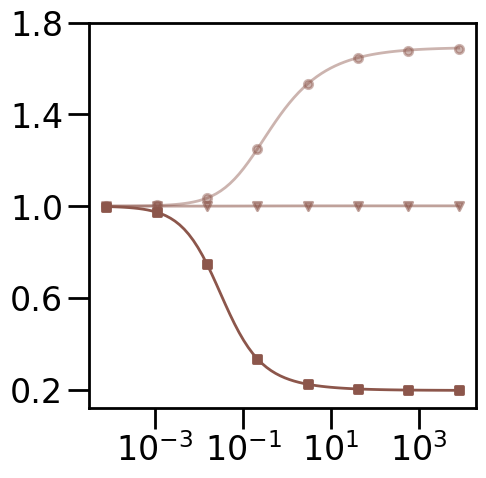

In [56]:
# >>>>>>>>>>>>>>>>>>>>>>>> Initialize Plotting >>>>>>>>>>>>>>>>>>>>>>>>
ax, colors, lineStyles, legend, labelfont, tickfont, C0 = plotHeader(
    scale=1.0, fixSize=True, sizeX=5, sizeY=5,
    lgdLoc=[0.65,0.05], lgdFontSize=18, lgdHandleL=0.3, 
    lgdTitle='$k_{off}^P\ (s^{-1})$', lgdTtlFontSize=18,
    labelFontSize=20, tickFontSize=24, 
    tickL=15, tickW=2, spineLineW=2
)
alphas = [4/9, 5/9, 1]
markers = ['o','v','s']
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

kbPList = np.unique(parm_num['kbPP'])
for i, kbP in enumerate(kbPList):
    selected_ana = (parm_ana['kbPP']==kbP)
    selected_num = (parm_num['kbPP']==kbP)
    ax.plot(
        (parm_ana['KPP']*parm_ana['CP0'])[selected_ana],
        (resT_ana*parm_ana['kbPN'])[selected_ana],
        lw=2, color=color_CP0, alpha=alphas[i],
    )
    ax.scatter(
        (parm_num['KPP']*parm_num['CP0'])[selected_num],
        (resT_num*parm_num['kbPN'])[selected_num],
        lw=2, zorder=5, marker=markers[i], 
        label='$10^{%.0f}$'%np.log10(kbP),
        color=color_CP0, alpha=alphas[i], 
    )
ax.semilogx()
# plt.legend(**legend)
plt.xticks([1e-3, 1e-1, 1e1, 1e3],**tickfont)
plt.yticks([0.2, 0.6, 1.0, 1.4, 1.8], **tickfont)
plt.savefig('resT_vs_KPP_CP0.png', transparent=True)

## supplementary) distribution of residence times

In [23]:
GenParms = lambda kbP, nDenseKPP :GenParameters(
    ifwrite=False, numTargets=0, kbPP_fixed=kbP,   
    KPN=[200], NP0=[0.1], area3Dto1D=[100],
    KPP=[0, 1e3, 1e4, 1e5, 1e6], 
)

In [24]:
parm_num = GenParms(1, 0)
print(parm_num['gamma']*parm_num['kaPN']*parm_num['CN0'])

equi_num = numericSolver(parm_df=parm_num, labels=labels, model=rxnNetwork)

0    1.142857
1    1.142857
2    1.142857
3    1.142857
4    1.142857
dtype: float64
2025-01-02 16:19:10.207578
Number of cores used:  5/36
Finished parallel processing.


In [25]:
from pathlib import Path

pdir = '../Simulations/Gillespie/DNA:criticDimer//'
Path(pdir).mkdir(parents=True, exist_ok=True)
parm_num.to_csv(pdir+'/parameters.csv')
equi_num.to_csv(pdir+'/equilibrium.csv')

In [5]:
def readGillespieSurvP(filename):
    with open(filename) as f:
        reading = False
        times = []
        survP = []
        numDiss = 'Not Read'
        for line in f:
            if line.strip() == '# START SURVIVAL PROB':
                reading = True
            elif line.strip() == '# END SURVIVAL PROB':
                reading = False
            elif line.strip() == '# Mean Residence Time':
                meanResT = float(f.readline().strip())
            elif line.strip().startswith('Number of dissociation events:'):
                numDiss = int(line.split(':')[1])
            else:
                if reading:
                    linelist = line.split()
                    times.append(float(linelist[0]))
                    survP.append(float(linelist[1]))
    return np.array(times), np.array(survP), meanResT, numDiss

def resample_time_sequence(sequence, dt):
    """
    Sample from the input sequence to ensure time steps are at least `dt` apart.

    Parameters:
        sequence (list): A list of increasing numbers.
        dt (float): Minimum time step between sampled values.

    Returns:
        tuple: A tuple containing:
            - list: A new sequence with time steps at least `dt` apart.
            - list: Indices of the sampled values in the original sequence.
    """
    # Initialize the sampled sequence and indices with the first element
    sampled = [sequence[0]]
    indices = [0]

    # Iterate through the input sequence and add elements that satisfy the condition
    for idx, value in enumerate(sequence):
        if value - sampled[-1] >= dt:
            sampled.append(value)
            indices.append(idx)

    return np.array(sampled), np.array(indices)

def getPDF(fileName, timeStep=0.01):
    times, survP, meanResT, numDiss  = readGillespieSurvP(fileName)
    timeX_origin, timeIdx = resample_time_sequence(times, dt=timeStep)
    timeX = (timeX_origin[1:]+timeX_origin[:-1])/2
    dTimeX = np.diff(timeX_origin)
    probY = -np.diff(survP[timeIdx])
    print(meanResT)
    return timeX, probY/dTimeX

1.6593
0.9994135716677269
1.6994
0.9992568039275463
1.7689
0.9951912244045684


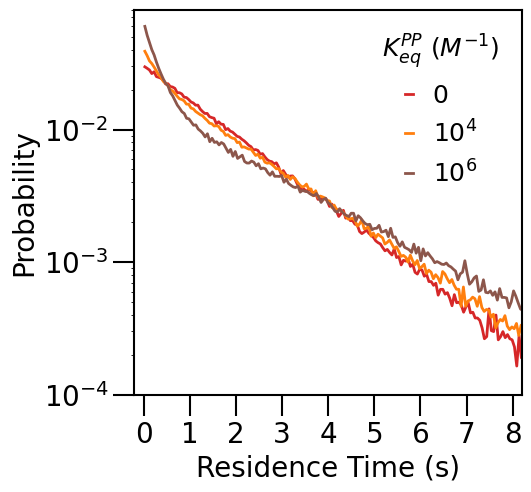

In [6]:
ax, colors, lineStyles, legend, labelfont, tickfont, C0 = plotHeader(
    scale=1.0, fixSize=True, sizeX=5, sizeY=5,
    lgdLoc='best', lgdFontSize=18, lgdHandleL=0.3, 
    lgdTitle='$K_{eq}^{PP}\ (M^{-1})$', lgdTtlFontSize=18,
    labelFontSize=20, tickFontSize=20, 
    tickL=15, tickW=1.5, spineLineW=1.5
)

KPPlog10 = ['0', '$10^3$', '$10^4$', '$10^5$', '$10^6$']
fileIndex = [0, 2, 4]
lineColors = ['tab:red', 'tab:orange', 'tab:brown']
lineStyles = ['-', '--', ':']
j = 0
tSampleStep = 0.05

for i in range(3):
    fileName = f'../Simulations/Gillespie/DNA:criticDimer/OUTPUTS_Nonly/out_{fileIndex[i]+4*j}_r0'
    timeX, probY  = getPDF(fileName, timeStep=tSampleStep)
    plt.plot(
        timeX, probY*tSampleStep, lw=2,
        color=lineColors[i], 
        ls=lineStyles[0],
        label=KPPlog10[fileIndex[i]],
    )
    print(np.sum(probY*tSampleStep))

plt.legend(**legend)
plt.xlim([-0.2,8.2])
plt.ylim([1e-4,8e-2])
plt.semilogy()

plt.xlabel('Residence Time (s)', **labelfont)
plt.ylabel('Probability', **labelfont)
plt.xticks(**tickfont)
plt.yticks(**tickfont)

plt.show()

## a) protein bound ratio v.s. KPN

In [37]:
parm_file = GenParameters(
    ifwrite=False, numTargets=0,
    KPN=np.logspace(1, 3, 5+2*40)*2.0, KPS=lambda KPN: 1e3*KPN, 
    NP0=[0.1], KPP=[np.inf], area3Dto1D=[1, 10],
)
parm_num_m = GenParameters(
    ifwrite=False, numTargets=0,
    KPN=10**np.array([1, 1.05 , 1.5,1.55,  2.,2.05,  2.5,2.55,  3.,3.05 ])*2.0, KPS=lambda KPN: 1e3*KPN, 
    NP0=[0.1], KPP=[0], area3Dto1D=[1, 10],
)
parm_num_irr = GenParameters(
    ifwrite=False, numTargets=0,
    KPN=np.logspace(1, 3, 5+2*0)*2.0, KPS=lambda KPN: 1e3*KPN, 
    NP0=[0.1], KPP=[np.inf], area3Dto1D=[1, 10],
)

In [38]:
def calc_pBoundA_irr(parm):
    gam = parm['gamma']
    KPN = parm['KPN']
    CN = parm['CN0']
    # combined parms
    chiPN = KPN*CN
    return (2*chiPN + gam*chiPN**2)/(1 + 2*chiPN + gam*chiPN**2)

def calc_pBoundA_monomer(parm):
    gam = parm['gamma']
    KPN = parm['KPN']
    CN = parm['CN0']
    # combined parms
    chiPN = KPN*CN
    return chiPN/(1+chiPN)

pBound_A_irr = calc_pBoundA_irr(parm_file)
pBound_A_m = calc_pBoundA_monomer(parm_file)

In [39]:
equi_num_irr = numericSolver(parm_df=parm_num_irr, labels=labels, model=rxnNetwork)
equi_num_m = numericSolver(parm_df=parm_num_m, labels=labels, model=rxnNetwork)

pBound_num_m = np.zeros(parm_num_m.shape[0])
for iloc in range(parm_num_m.shape[0]):
    pBound_num_m[iloc] = num.calc_BoundRatio_modelA(parm_num_m.iloc[iloc], equi_num_m.iloc[iloc])
    
pBound_num_irr = np.zeros(parm_num_irr.shape[0])
for iloc in range(parm_num_irr.shape[0]):
    pBound_num_irr[iloc] = num.calc_BoundRatio_modelA(parm_num_irr.iloc[iloc], equi_num_irr.iloc[iloc])

2025-03-05 19:21:56.537964
Number of cores used:  10/36
Finished parallel processing.
2025-03-05 19:21:56.742353
Number of cores used:  20/36
Finished parallel processing.


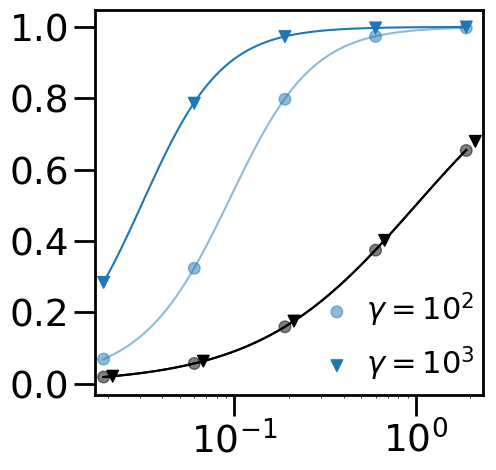

In [44]:
# >>>>>>>>>>>>>>>>>>>>>>>> Initialize Plotting >>>>>>>>>>>>>>>>>>>>>>>>
ax, _, lineStyles, legend, labelfont, tickfont, C0 = plotHeader(
    scale=1.0, fixSize=True, sizeX=5, sizeY=5,
    lgdLoc=[0.58,0.00], lgdFontSize=22, lgdHandleL=0.3, 
    lgdTitle='', lgdTtlFontSize=22,
    labelFontSize=20, tickFontSize=27, 
    tickL=15, tickW=2, spineLineW=2
)
alphas = [0.5, 1]
markers = ['o','v']
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
xlim = [(parm_num_m['KPN']*parm_num_m['CN0']).min()*0.9, (parm_num_m['KPN']*parm_num_m['CN0']).max()*1.1]
gamList = np.unique(parm_file['gamma'])
for j, gam in enumerate(gamList):
    selected = ((parm_file['gamma']==gam))
    # analytics
    ax.plot(
        (parm_file['KPN']*parm_file['CN0'])[selected],
        pBound_A_irr[selected],
        color = color_gamma, alpha=alphas[j],
        
    )
    ax.plot(
        (parm_file['KPN']*parm_file['CN0'])[selected],
        pBound_A_m[selected],
        color='black',
    )
    # numerics
    selected_num = ((parm_num_irr['gamma']==gam))
    ax.scatter(
        (parm_num_irr['KPN']*parm_num_irr['CN0'])[selected_num],
        pBound_num_irr[selected_num], s=70,
        ls='', marker=markers[j],
        color=color_gamma, alpha=alphas[j],
        label='$\\gamma=10^{%.0f}$'%np.log10(gam),
    )
    selected_num = ((parm_num_m['gamma']==gam))
    ax.scatter(
        (parm_num_m['KPN']*parm_num_m['CN0'])[selected_num][j::2],
        pBound_num_m[selected_num][j::2],  s=70,
        marker=markers[j], alpha=alphas[j],
        ls='', color='black',
    )
    

ax.semilogx()
plt.xlim(xlim)
# ax.set_aspect(aspect=1, adjustable='box')
plt.legend(**legend)
plt.xticks(**tickfont)
plt.yticks(**tickfont)
# plt.grid(axis='x')
plt.savefig('pBound_vs_chiN_gamma.png', transparent=True)
# plt.show()